## Module 9 Class activities
This notebook is a starting point for the exercises and activities that we'll do in class. We'll estimate topic models and do some sentiment analysis.

We'll continue with our example from last class: the [City of Palm Springs General Plan update](https://www.psgeneralplan.com).

Before you attempt any of these activities, make sure to watch the video lectures for this module.

### Reading and cleaning PDFs

Let's read in [this PDF of public comments](https://www.psgeneralplan.com/_files/ugd/89af76_0b8c3cd9a25140f4a9791570af8d6ba0.pdf). It's in the `data/` folder in your GitHub repository.

This is the code from last class. We read in the text of the PDF, and exclude the first 9 pages which are survey responses, not comments.

In [1]:
from pdfminer.high_level import extract_text

fn = '../data/PS_VP_Survey_Results_FINAL.pdf'
txt = extract_text(fn)
txt = txt[txt.find("It doesn"):]

txt[:2000] # see what it looks like

"It doesn’t speak about the people that are neither residents nor visitors. I work here with a lot of\npride. But I don’t consider myself a visitor.\n\n3/25/2020 3:22 PM\n\nHeight restrictions that are actually adhered to. Completion Bonds on all projects in Palm\nSprings.\n\n3/12/2020 5:23 PM\n\n1) James O. Jessen Community Center updated 2) Traffic lights, crosswalk 3) Pickleball courts\n4) Community Gardens and Art Park\n\n3/11/2020 4:26 PM\n\nExpand economic opportunities to include Green energy workforce training. Workforce\ndevelopment to become a diversified economy. Create more affordable Housing for single-\nfamily residential.\n\n3/11/2020 4:18 PM\n\nMany areas in the City are blighted and lack funding to advance the lower income areas of the\nNorthern communities.\n\n3/11/2020 4:10 PM\n\nAlso needs to focus on health and well-being issues.\n\n-Revisit Economic Growth -Incorporate Sustainability for local just visitors -While we are a\nresort town, residents seem to be forced

Before we clean up the text further, let's split this into a list of comments. Note that each comment seems to be separated by `AM\n\n` or `PM\n\n`. So if we split on `M\n\n`, we should get a list of comments.

Once you have a list, now we can clean it up using regex. Here's my suggestion:
* write a function that takes a string, and returns a clean string (remove excess whitespace and characters that are not letters or a space)
* create a new list by applying this function to each element of your list of comments

The latter can be done with something like:

`newlist = [clean_string(comment) for comment in oldlist]`.

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Create a list of cleaned comments.
</div>

In [2]:
import re
split_comments = txt.split('M\n\n')

def clean_string(comment):
    
    comment = re.sub(r"\s+", " ", comment)  # remove excess whitespace
    comment = re.sub(r"[^A-z\s]", "", comment)  # remove characters that are not letters\
    # comment = re.sub(r"[^A-z\s]", "", comment)  # remove characters that are not letters\
    cleaned_comment = re.sub(r"\s+", " ", comment)      # repeat step 1 to remove any new whitespace created in the previous step
   
    return cleaned_comment

# create a list of comments
comments = [clean_string(comment) for comment in split_comments] # # your code here 
comments[:10]

# then a list of cleaned comments

['It doesnt speak about the people that are neither residents nor visitors I work here with a lot of pride But I dont consider myself a visitor P',
 'Height restrictions that are actually adhered to Completion Bonds on all projects in Palm Springs P',
 ' James O Jessen Community Center updated Traffic lights crosswalk Pickleball courts Community Gardens and Art Park P',
 'Expand economic opportunities to include Green energy workforce training Workforce development to become a diversified economy Create more affordable Housing for single family residential P',
 'Many areas in the City are blighted and lack funding to advance the lower income areas of the Northern communities P',
 'Also needs to focus on health and wellbeing issues Revisit Economic Growth Incorporate Sustainability for local just visitors While we are a resort town residents seem to be forced out due to increase in sustaining visitorship Not sure at this point a reference to environmental issues is needed Change the phr

One final cleaning step: you probably notice that all your comments end in `P` or `A`. 

Remove these terminal letters from each comment (or just delete the last two characters of each comment). And remove comments that are just ` P` or ` A` (perhaps you can ignore all comments that are less than, say, 5 characters long).

*Hint*: Try another list comprehension (or two).

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Clean up your comments further and drop the short ones.
</div>

In [3]:
# Code to remove single alphabet elements. Removes all P/A at the end.  
# https://stackoverflow.com/questions/32705962/removing-any-single-letter-on-a-string-in-python

clean_comment = lambda comment: re.sub('\s*\\b([a-z]|[A-Z])\\b', '', comment) 
comments = [clean_comment(comment) for comment in comments] # # your code here 

comments[:10]
# removes and item that is less than 5 characters long
filtered_comments = [comment for comment in comments if len(comment) >= 5 ]
filtered_comments[:10]

['It doesnt speak about the people that are neither residents nor visitors work here with lot of pride But dont consider myself visitor',
 'Height restrictions that are actually adhered to Completion Bonds on all projects in Palm Springs',
 ' James Jessen Community Center updated Traffic lights crosswalk Pickleball courts Community Gardens and Art Park',
 'Expand economic opportunities to include Green energy workforce training Workforce development to become diversified economy Create more affordable Housing for single family residential',
 'Many areas in the City are blighted and lack funding to advance the lower income areas of the Northern communities',
 'Also needs to focus on health and wellbeing issues Revisit Economic Growth Incorporate Sustainability for local just visitors While we are resort town residents seem to be forced out due to increase in sustaining visitorship Not sure at this point reference to environmental issues is needed Change the phrasing word unity and rewor

### Sentiment analysis
Now we have our cleaned up list of comments. Let's do some sentiment analysis. If we create a dataframe with our comments (as one column) and the polarity score (as a second column), the analysis later on becomes easier.

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Create a list of polarity scores, one for each comment. Then create a dataframe, with one column for the comment and one for the polarity score.</div>

In [4]:
from textblob import TextBlob
import pandas as pd
cdf=pd.DataFrame(filtered_comments, columns=['comment'])
cdf['polarity']= cdf['comment'].apply( lambda x: TextBlob(x).sentiment.polarity)
cdf

,comment,polarity
0,It doesnt speak about the people that are neit...,0.000000
1,Height restrictions that are actually adhered ...,0.000000
2,James Jessen Community Center updated Traffic...,-0.100000
3,Expand economic opportunities to include Green...,0.107143
4,Many areas in the City are blighted and lack f...,0.500000
...,...,...
445,Palm Springs General Plan Vision Priorities S...,0.060830
446,Stop the endless starting of projects that sta...,0.041667
447,Rewrite Priority to read Preserve protect cons...,-0.008333
448,Same response as two questions back If it isnt...,0.132500


Take a look at the comments with some of the highest and lowest polarity scores. Do the scores make sense? What words is it picking up on?

Note that a simple sentiment analyzer like TextBlob won't capture nuances, but in aggregate the results can be useful.

In [5]:
# your code here
cdf.sort_values('polarity', ascending=False, inplace=True)
pd.set_option('display.max_columns', None)
print("higest scores \n", cdf['comment'].head(10))
print("-------")
print("lowest scores \n", cdf['comment'].tail(10))


higest scores 
 234    The PDDR Zoning Affordability is Excellent Nor...
13     Should also state accepts diversity that exist...
209    We have all we need in retail believe the city...
415    More bike lanes pleasewould be great if CV Lin...
92     It is good place to live in because the great ...
10     We need to prioritize good environmental stewa...
208    Again we are overstating the description full ...
365    Palm Springs does not look unique any more It ...
388     traffc signal is needed at Tahquitz and Civic...
231    Retail is DYING Weve already demolished both o...
Name: comment, dtype: object
-------
lowest scores 
 197    We need to promote mom and pop stores and slow...
22     It provides what it should look like unfortuna...
391     dont see it The two way Indian conversion was...
125    Building heights would have to be raised for e...
409    Im not sure this manifests itself in the city ...
397    This is vague also its redundant you already m...
34     Does not men

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Do some plots of the sentiment and other analyses that try and capture sentiment on particular issues.</div>

For example, after you plot the overall sentiment scores (a histogram?), you might want to plot the scores where people mention specific issues. For example, you could add a column that is `True` if the comment mentions housing, and then plot the scores only for those rows. Experiment!

<Axes: ylabel='Count'>

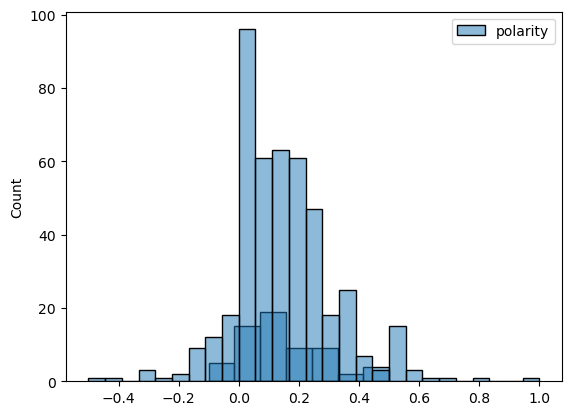

In [6]:
# your code here
import seaborn as sns
# sns.histplot(cdf['housing'] if 'housing' in cdf['comment'].lower())

# https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html
filtered_df = cdf[cdf['comment'].str.lower().str.contains('housing', na=False)]

# Plot a histogram using seaborn
sns.histplot(filtered_df)
sns.histplot(cdf)



In [126]:
cdf

,comment,polarity
234,The PDDR Zoning Affordability is Excellent Nor...,1.000000
13,Should also state accepts diversity that exist...,0.800000
209,We have all we need in retail believe the city...,0.666667
415,More bike lanes pleasewould be great if CV Lin...,0.650000
92,It is good place to live in because the great ...,0.606061
...,...,...
397,This is vague also its redundant you already m...,-0.288889
34,Does not mention activitiesattractionsadventur...,-0.291667
60,link sustainable economic growth with diversif...,-0.300000
392,This is joke The improvement Indian Canyon run...,-0.400000


## Topic modeling
Now let's see if we can identify different topics in the list of comments.

First, we'll need to do a bit more cleanup. For each comment, turn it into a list of words, and exclude stopwords. (After you see the results of your topic modeling, you might want to add more stopwords.) You should end up with a list of lists.

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Turn your list of comments into a list of lists of words, excluding stopwords.</div>

In [127]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

# your code here
swords = stopwords.words('english')
wordlists = [[word for word in word_tokenize(cap.lower()) 
                 if word not in swords] 
                 for cap in filtered_comments]

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Estimate and visualize a topic model from your wordlists. Experiment with the number of topics and the other hyperparameters.</div>

Remember: 
* `alpha` controls the expected distribution of topics across documents. A higher value of `alpha` means that each document is expected to contain more of a mix of topics, rather than focusing on a few topics.
* `eta` (sometimes called beta) controls the expected distribution of words across topics. A higher value of `eta` means that topics are more similar in terms of their mixture of words.

In [131]:
import gensim
import pyLDAvis
import pyLDAvis.gensim_models 

# your code here

dictionary = gensim.corpora.Dictionary(wordlists)
corpus = [dictionary.doc2bow(wl) for wl in wordlists]
# LdaMulticore uses multiple cores (thus, it runs faster)
# If you have problems, try replacing LdaMulticore with LdaModel
model = gensim.models.LdaMulticore(corpus, id2word=dictionary, num_topics=10)

model.show_topics()

[(0,
  '0.013*"need" + 0.012*"palm" + 0.011*"springs" + 0.008*"needs" + 0.006*"dont" + 0.006*"city" + 0.005*"use" + 0.005*"downtown" + 0.005*"people" + 0.005*"like"'),
 (1,
  '0.019*"city" + 0.014*"palm" + 0.012*"springs" + 0.008*"priority" + 0.007*"needs" + 0.007*"high" + 0.006*"development" + 0.006*"would" + 0.006*"businesses" + 0.005*"business"'),
 (2,
  '0.026*"springs" + 0.026*"palm" + 0.012*"city" + 0.011*"need" + 0.009*"vision" + 0.008*"focus" + 0.007*"businesses" + 0.007*"general" + 0.007*"priority" + 0.007*"priorities"'),
 (3,
  '0.017*"priority" + 0.012*"city" + 0.011*"palm" + 0.010*"would" + 0.009*"traffic" + 0.009*"need" + 0.009*"needs" + 0.009*"use" + 0.009*"springs" + 0.007*"plan"'),
 (4,
  '0.017*"priority" + 0.017*"palm" + 0.016*"housing" + 0.016*"springs" + 0.012*"needs" + 0.010*"need" + 0.010*"opportunities" + 0.008*"retail" + 0.007*"city" + 0.007*"homeless"'),
 (5,
  '0.010*"businesses" + 0.008*"palm" + 0.008*"residents" + 0.008*"city" + 0.007*"springs" + 0.006*"park

In [132]:
import pyLDAvis
import pyLDAvis.gensim_models   # note that in previous versions this was called pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(model, corpus, dictionary)

/Users/chaithra/opt/anaconda3/envs/uds/lib/python3.10/site-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.048811 -0.040216       1        1  19.931984
9     -0.000552 -0.032363       2        1  16.057327
2      0.021082 -0.061119       3        1  13.159704
3     -0.073034  0.058814       4        1  10.221750
6      0.059156  0.051977       5        1   9.875212
1      0.036002 -0.024234       6        1   8.334150
0     -0.027243  0.004205       7        1   7.067244
7     -0.033373 -0.001989       8        1   6.844525
5      0.029660  0.029291       9        1   4.386903
8      0.037112  0.015634      10        1   4.121203, topic_info=           Term        Freq       Total Category  logprob  loglift
794    priority  129.000000  129.000000  Default  30.0000  30.0000
45      housing  124.000000  124.000000  Default  29.0000  29.0000
156  businesses   64.000000   64.000000  Default  28.0000  28.0000
55         city  162.000000  162.000000  Default  27.0000  27.0000
17         palm  199.000000  199.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
23    community    2.399483   59.557339  Topic10  -5.5002  -0.0227
156  businesses    2.295867   64.661089  Topic10  -5.5444  -0.1490
166        high    2.057395   44.621171  Topic10  -5.6540   0.1123
45      housing    2.276588  124.294765  Topic10  -5.5528  -0.8110
2          dont    1.878875   52.825448  Topic10  -5.7448  -0.1473

[787 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
239       7  0.686525       abilities
948       2  0.598161        abrasive
2340      2  0.598160       accessory
2679      2  0.598142       accidents
600       8  0.697639  accommodations
...     ...       ...             ...
1261      5  0.031350             yes
1261      6  0.031350             yes
1261      7  0.062700             yes
1261      8  0.156749             yes
1261     10  0.031350             yes

[1897 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 10, 3, 4, 7, 2, 1, 8, 6, 9])

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Explain your topic model - write a sentence or two, and explain to your neighbor. What does each topic signify, and how did you choose alpha and eta?</div>

Your comments here.

## Extensions to topic modeling and sentiment analysis
One potential use of these models is to look at differences across space or across time. 

Or we could look at how word frequency changes across space or cities.

If you have time, try this with the San Francisco Board of Supervisors meetings. [This webpage](http://sanfrancisco.granicus.com/ViewPublisher.php?view_id=10) gives the archived transcripts ("caption notes").

You could scrape all of the URLs (that's a good exercise!), but for now, just manually create a list with a 10-20 or so of the caption notes.

Write a function that for a given URL:
* Gets the text (use `requests`)
* Cleans the text
* Tokenizes (splits into words)

Then, think about how you might estimate a topic model.

Would sentiment analysis be useful here?

This is an open-ended prompt, so spend some time thinking through the steps conceptually, even if you don't get far in implementing it. For example, how will you organize the text of each documents and the counts? In a list? A dataframe? Will you loop through each URL?

In [ ]:
# your code here

<div class="alert alert-block alert-info">
<h3>You should now be able to:</h3>
<ul>
  <li>Do further cleaning of text documents</li>
  <li>Estimate and interpret sentiments of texts</li>
  <li>Estimate and interpret topic models</li>
</ul>
</div>